# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district 
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [2]:
# It looks like the housing.csv in this repo has the wrong data. So I added the right one.

In [3]:
housing = pd.read_csv("../data/housing.csv")

print(housing.head())
print(housing.dtypes)

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude             float64
latitude              float64
housing_median_

#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

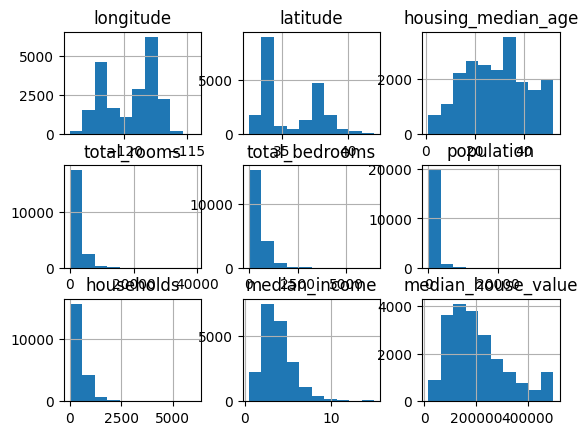

In [4]:
housing.hist()
plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you. 

In [5]:
print(housing.isnull().sum())
housing.total_bedrooms.fillna(0, inplace=True)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


/var/folders/zf/m3g54d9d25q0jn4s7wbccll00000gn/T/ipykernel_61669/625138704.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing.total_bedrooms.fillna(0, inplace=True)


2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per household".

In [6]:
housing["rooms_per_household"] = housing.total_rooms / housing.households
housing["population_per_household"] = np.ceil(housing.population / housing.households)
housing["bedrooms_per_household"] = np.ceil(housing.total_bedrooms / housing.households)

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,3.0,2.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,3.0,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,3.0,2.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,3.0,2.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,3.0,2.0


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [7]:
print(housing.rooms_per_household.nlargest(10))
print(housing.rooms_per_household.nsmallest(10))

housing.drop(index=[1914, 1979, 5916, 8219], inplace=True)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64
5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64


In [8]:
print(housing.rooms_per_household.nlargest(10))
print(housing.rooms_per_household.nsmallest(10))

12447    62.422222
1913     61.812500
11862    59.875000
1912     56.269231
9676     52.848214
11707    52.690476
2395     50.837838
1240     47.515152
11832    41.333333
11833    39.755906
Name: rooms_per_household, dtype: float64
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
9319     1.553030
4585     1.598131
Name: rooms_per_household, dtype: float64


# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

<Axes: >

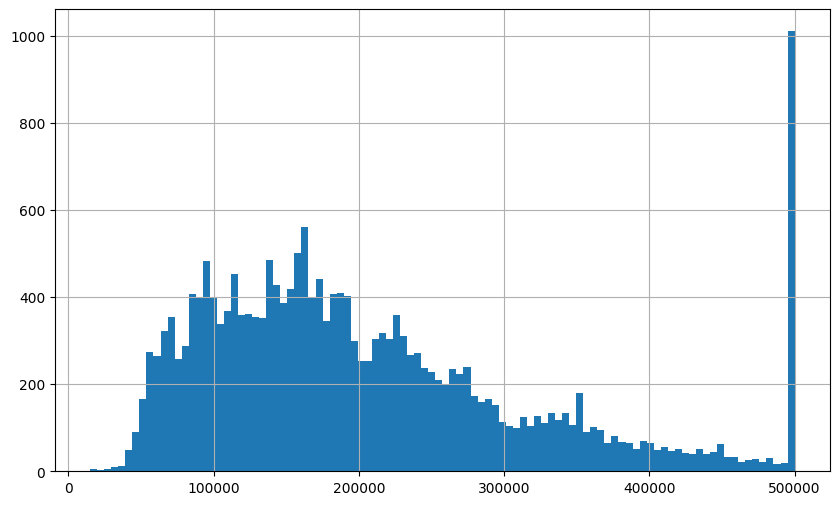

In [9]:
housing["median_house_value"].hist(bins=100, figsize=(10, 6))

2. Check out what variables correlates the most with "median house value"

In [10]:
corrolation_matrix = housing.corr(numeric_only=True)

print(corrolation_matrix.median_house_value)

# it is => median_income               0.688369


longitude                  -0.045911
latitude                   -0.144413
housing_median_age          0.105653
total_rooms                 0.134173
total_bedrooms              0.049162
population                 -0.024598
households                  0.065927
median_income               0.688369
median_house_value          1.000000
rooms_per_household         0.171586
population_per_household   -0.024400
bedrooms_per_household     -0.047738
Name: median_house_value, dtype: float64


3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

<Axes: >

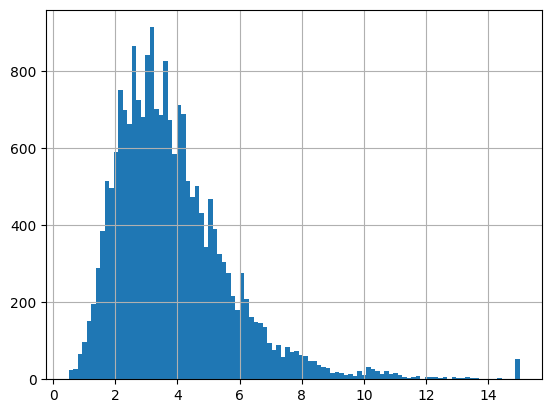

In [11]:
housing.median_income.hist(bins=100)

4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

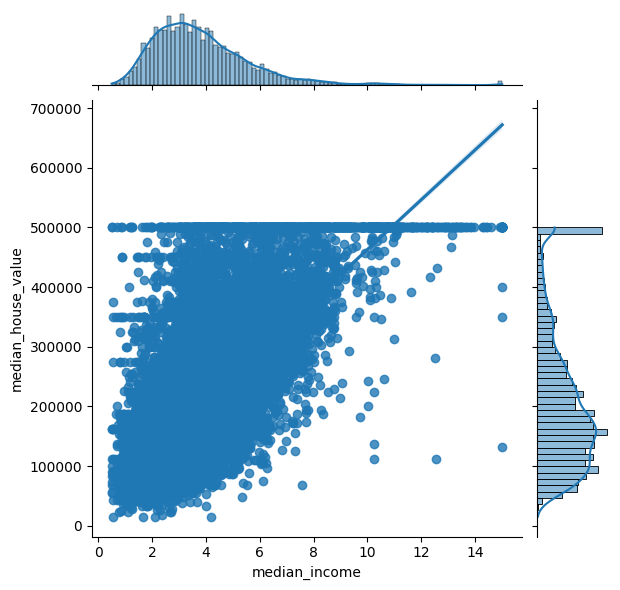

In [18]:
sns.jointplot( data=housing, x="median_income", y="median_house_value", kind="reg")

5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

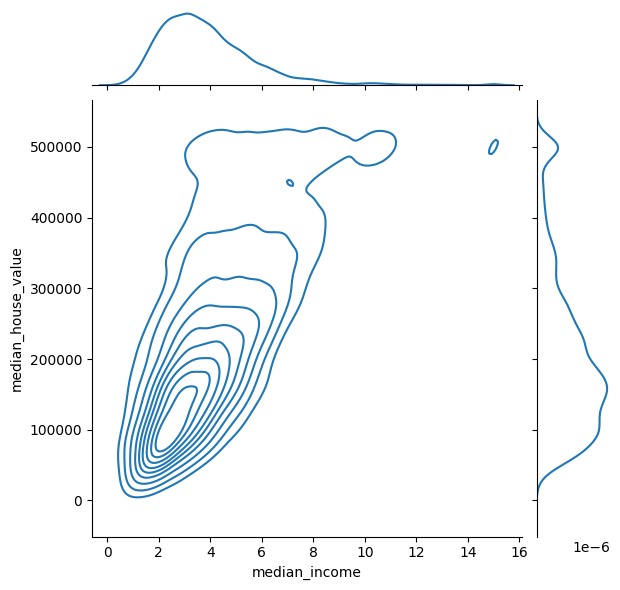

In [19]:
sns.jointplot( data=housing, x="median_income", y="median_house_value", kind="kde")

#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [ ]:
def get_income_category(median_income, quantiles):
    if median_income > quantiles[0.95]:
        return "Very High"
    if median_income > quantiles[0.75]:
        return "High"
    if median_income > quantiles[0.5]:
        return "Above_Average"
    if median_income > quantiles[0.25]:
        return "Below_Average"
    return "Low"

quantiles = {
    0.95: housing.median_income.quantile(0.95),
    0.75: housing.median_income.quantile(0.75),
    0.5: housing.median_income.quantile(0.5),
    0.25: housing.median_income.quantile(0.25)
}

housing["income_cat"] = [get_income_category(i, quantiles) for i in housing.median_income]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_household,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,3.0,2.0,Very High
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,3.0,1.0,Very High
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,3.0,2.0,High
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,3.0,2.0,High
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,3.0,2.0,Above_Average


2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

<Axes: xlabel='income_cat', ylabel='count'>

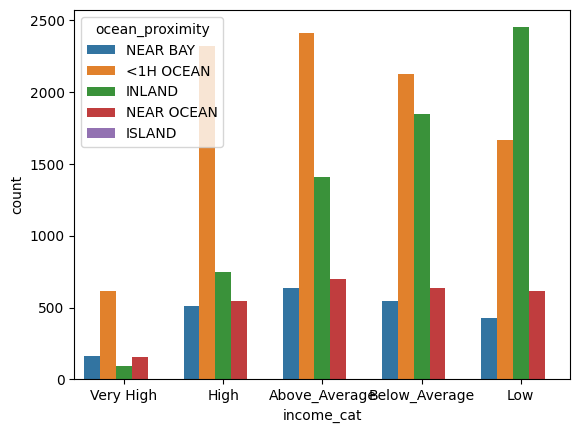

In [26]:
sns.countplot(data=housing, x="income_cat", hue="ocean_proximity")

# we can see that more household with a high income live near the ocean

3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

<Axes: xlabel='income_cat', ylabel='median_house_value'>

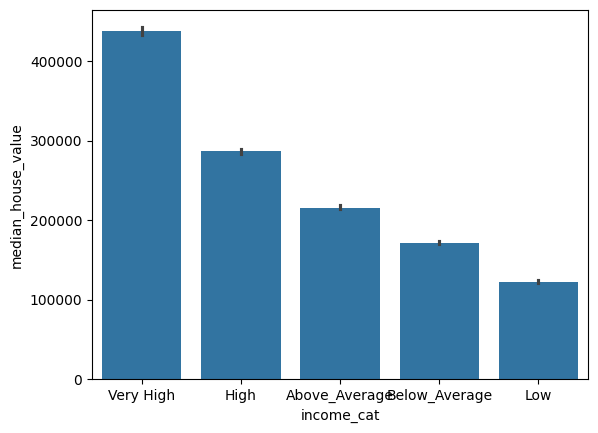

In [29]:
sns.barplot(data=housing, y="median_house_value", x="income_cat")

<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

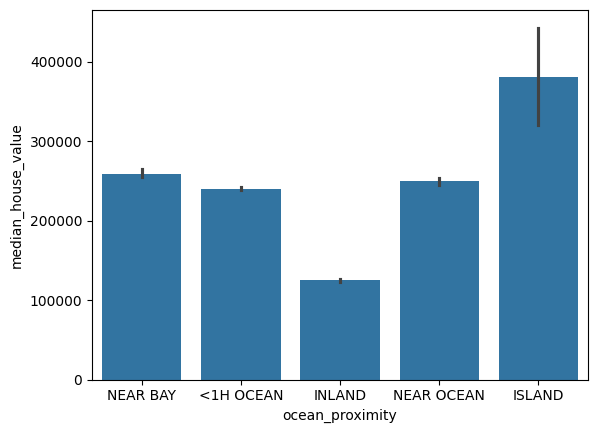

In [30]:
sns.barplot(data=housing, y="median_house_value", x="ocean_proximity")

# very high income means a higher median_house_value and island/near ocean means the same

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [47]:
pivot_table = housing.pivot_table(index="income_cat", columns="ocean_proximity")

# Select all columns with 'ISLAND' in the second level of the multi-index
columns_to_drop = [col for col in pivot_table.columns if col[1] == 'ISLAND']

pivot_table.drop(columns=columns_to_drop, inplace=True)
pivot_table.head()


bedrooms_per_household                                 \
ocean_proximity              <1H OCEAN    INLAND  NEAR BAY NEAR OCEAN   
income_cat                                                              
Above_Average                 1.730100  1.836764  1.738245   1.716120   
Below_Average                 1.799435  1.892799  1.822993   1.811321   
High                          1.641501  1.751337  1.678363   1.702011   
Low                           1.808868  1.899959  1.833333   1.837134   
Very High                     1.660131  1.614583  1.642424   1.691824   

                 households                                      \
ocean_proximity   <1H OCEAN      INLAND    NEAR BAY  NEAR OCEAN   
income_cat                                                        
Above_Average    515.657960  540.762243  505.103448  519.731812   
Below_Average    560.371940  481.054683  514.233577  520.932390   
High             514.970233  540.473262  514.756335  503.053016   
Low              493.127022  422.075133  432.638498  467.543974   
Very High        456.500000  409.947917  403.036364  467.830189   

                housing_median_age             ... rooms_per_household  \
ocean_proximity          <1H OCEAN     INLAND  ...            NEAR BAY   
income_cat                                     ...                       
Above_Average            29.521559  21.058197  ...            5.124375   
Below_Average            30.513653  24.497022  ...            4.597335   
High                     25.919758  18.339572  ...            6.113124   
Low                      33.343919  27.890568  ...            4.255262   
Very High                25.651961  20.822917  ...            7.395394   

                           total_bedrooms                                      \
ocean_proximity NEAR OCEAN      <1H OCEAN      INLAND    NEAR BAY  NEAR OCEAN   
income_cat                                                                      
Above_Average     5.321866     539.434080  590.169624  527.691223  549.954351   
Below_Average     4.735438     588.548964  539.619383  541.478102  553.144654   
High              6.190613     529.578085  580.189840  525.514620  526.157221   
Low               4.097054     523.369083  473.766027  460.183099  506.221498   
Very High         7.499723     465.957516  467.093750  413.157576  500.113208   

                 total_rooms                                         
ocean_proximity    <1H OCEAN       INLAND     NEAR BAY   NEAR OCEAN  
income_cat                                                           
Above_Average    2638.907546  3269.575586  2535.642633  2728.503566  
Below_Average    2440.060264  2692.620466  2309.248175  2417.916667  
High             3154.969370  3739.812834  3114.033138  3116.352834  
Low              1829.877771  2080.808085  1728.089202  1878.925081  
Very High        3427.316993  3406.281250  2990.587879  3513.610063  

[5 rows x 48 columns]

5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

<Axes: xlabel='None-ocean_proximity', ylabel='income_cat'>

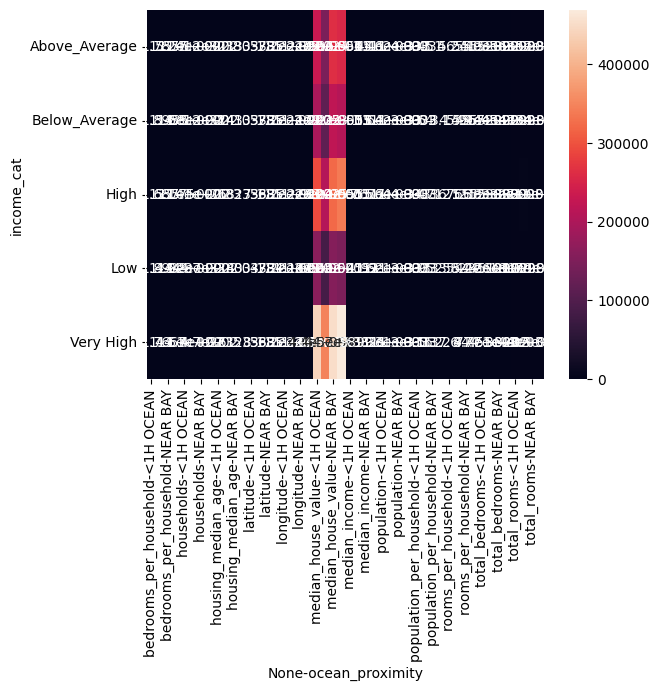

In [52]:
sns.heatmap(data=pivot_table, annot=True)

# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [53]:
housing.drop(columns=["income_cat"], inplace=True)

2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`. 

In [62]:
import scipy.stats as stats

z_scored = housing.drop(columns=["ocean_proximity"])
z_scored.apply(lambda x: stats.zscore(x))

z_scored.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,3.0,2.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,3.0,1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,3.0,2.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,3.0,2.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,3.0,2.0


3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [67]:
# avoid multicolinearity by setting drop_first=True
df_dummies = pd.get_dummies(housing.ocean_proximity, columns=["ocean_proximity"], drop_first=True)

print(df_dummies.head())

   INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0   False   False      True       False
1   False   False      True       False
2   False   False      True       False
3   False   False      True       False
4   False   False      True       False


4. Save our predicting variable to `y`.

In [94]:
y = housing.median_house_value

5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [95]:
X = pd.concat([z_scored.drop(columns=["median_house_value"]), df_dummies], axis=1)

# Part 4 - Machine Learning 




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [96]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model. 

In [97]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_train)

3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look? 

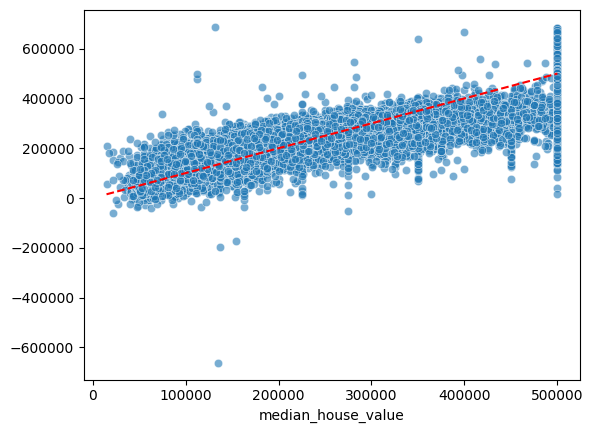

In [98]:
sns.scatterplot(x=y_train, y=y_pred, alpha=.6)

# create red line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.show()

4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [99]:
from sklearn import metrics

In [100]:
mean_squared_error = metrics.mean_squared_error(y_train, y_pred)
r2_score = metrics.r2_score(y_train, y_pred)

In [101]:
print(f"Mean squred error: {mean_squared_error}. R2 score: {r2_score}")

Mean squred error: 4672754923.812272. R2 score: 0.647656656254989


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

In [102]:
y_pred_test = lr_model.predict(X_test)

2. Print the mean_squared_error and R^2-score again. What has happened?

In [103]:
mean_squared_error_test = metrics.mean_squared_error(y_test, y_pred_test)
r2_score_test = metrics.r2_score(y_test, y_pred_test)

In [104]:
print(f"Mean squred error: {mean_squared_error_test}. R2 score: {r2_score_test}")

Mean squred error: 4702586053.995203. R2 score: 0.6521039540687901


3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [105]:
root_mean_squared_error = metrics.root_mean_squared_error(y_test, y_pred_test)

print("RMSE:", root_mean_squared_error)

RMSE: 68575.40414751635


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

In [109]:
df = {
    "y_test": y_test,
    "y_pred": y_pred
}

print(y_test)
print(y_pred)

8300     418800.0
10035    116700.0
12565     92400.0
82       112500.0
18437    183900.0
           ...   
13066    104400.0
4387     187500.0
4470     156500.0
1771     114600.0
16264     62000.0
Name: median_house_value, Length: 4128, dtype: float64
[309840.91958307 359095.02601921 159629.05929069 ... 147742.95940416
  86860.02202737 183747.35128078]


2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

In [117]:
absolut_errors = abs(y_test - y_pred_test)

print(absolut_errors)

8300     123713.304127
10035     33658.865775
12565     44550.944547
82        53990.452937
18437     56275.062204
             ...      
13066     32901.043398
4387      21206.717863
4470       3202.158150
1771     103664.163231
16264     41492.652218
Name: median_house_value, Length: 4128, dtype: float64


3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

In [118]:
print(absolut_errors.mean())

# misses the real prices by an average of around 50.059 €

50058.93058150615


# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_train)

In [129]:
rf_mean_squared_error_test = metrics.mean_squared_error(y_train, rf_y_pred)
rf_r2_score_test = metrics.r2_score(y_train, rf_y_pred)

In [131]:
print(rf_mean_squared_error_test, rf_r2_score_test)

333204338.2704429 0.9748751362716945


2. Make prediction on the test data and evaluate you results.

In [132]:
rf_y_pred_test = rf_model.predict(X_test)

In [135]:
rf_mean_squared_error_test = metrics.mean_squared_error(y_test, rf_y_pred_test)
rf_r2_score_test = metrics.r2_score(y_test, rf_y_pred_test)

In [138]:
print(rf_mean_squared_error_test, rf_r2_score_test)

2536227805.523877 0.8123705520767815


In [139]:
absolut_errors = abs(y_test - rf_y_pred_test)

print(absolut_errors.mean())

# misses the real prices by an average of around 32.380,40 €

32380.4003125
